In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
pred_var = 'Additional_Doses_Vax_Pct'

In [3]:
df = pd.read_csv('df_post_eda.csv')

df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date')[pred_var].mean()
#df.set_index('Date', inplace=True)

#subset data to be only dates and predictin variable values
data = pd.DataFrame(df)

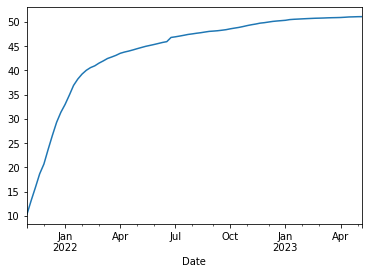

In [5]:
# original time series for whole dataset
df.plot()
plt.show()

In [7]:
# Create lagged dataset
values = data
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

                  t-1        t+1
Date                            
2021-11-03        NaN  10.332812
2021-11-10  10.332812  13.185937
2021-11-17  13.185937  15.871875
2021-11-24  15.871875  18.675000
2021-12-01  18.675000  20.689062


In [12]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.7)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [14]:
# persistence model
def model_persistence(x):
    return x

In [18]:
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % test_score)

Test RMSE: 0.067


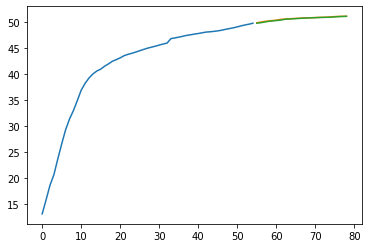

In [19]:
# plot predictions and expected results
plt.plot(train_y)
plt.plot([None for i in train_y] + [x for x in test_y])
plt.plot([None for i in train_y] + [x for x in predictions])
plt.show()

In [20]:
# Split data into test and train

# Determine the split point (e.g., 70% for training, 30% for testing)
split_date = int(len(data) * 0.7)
data = data.sort_index(ascending=True)
# Split the data
train_data = data.iloc[:split_date]
test_data = data.iloc[split_date:]

In [21]:
# baseline/ naive model

baseline_forecast = test_data.shift(1)  # Forecast based on the last observed value

# Evaluate the baseline model's performance
rmse = sqrt(mean_squared_error(test_data[1:], baseline_forecast[1:]))
print(f"Baseline Model RMSE: {rmse}")

Baseline Model RMSE: 0.06512001618666988
